In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import GRU

from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [107]:
df = pd.read_csv('nikkei_2001_2018.csv',encoding='SHIFT-JIS')
df.head()

,日付,始値,高値,安値,終値,出来高,終値調整値
0,2001-07-13,12490,12490,12300,12310,259430,12310
1,2001-07-16,12400,12400,12250,12330,99740,12330
2,2001-07-17,12170,12170,12100,12120,93150,12120
3,2001-07-18,12150,12150,11830,11840,165330,11840
4,2001-07-19,11990,11990,11860,11920,620220,11920


In [128]:
print(df['始値'].max())
print(df['終値'].max())

print(df['始値'].min())
print(df['終値'].min())

24770
24790
7200
7200


,始値,終値
0,12490,12310
1,12400,12330
2,12170,12120
3,12150,11840
4,11990,11920
5,11950,11570
6,11560,11840
7,11750,11860
8,11940,11830
9,11790,11820


In [129]:
#データの標準化
df_temp = df.loc[:, ['始値', '終値']]

scaler = preprocessing.MinMaxScaler()
scaler.fit_transform([[7200],[24790]])

df_temp = scaler.transform(df_temp)

df_temp = pd.DataFrame(df_temp)

df['open'] = df_temp[0]
df['close'] = df_temp[1]

df

,日付,始値,高値,安値,終値,出来高,終値調整値,open,close
0,2001-07-13,12490,12490,12300,12310,259430,12310,0.300739,0.290506
1,2001-07-16,12400,12400,12250,12330,99740,12330,0.295623,0.291643
2,2001-07-17,12170,12170,12100,12120,93150,12120,0.282547,0.279704
3,2001-07-18,12150,12150,11830,11840,165330,11840,0.281410,0.263786
4,2001-07-19,11990,11990,11860,11920,620220,11920,0.272314,0.268334
5,2001-07-23,11950,11950,11540,11570,170700,11570,0.270040,0.248437
6,2001-07-24,11560,11860,11560,11840,173370,11840,0.247868,0.263786
7,2001-07-25,11750,12020,11750,11860,207180,11860,0.258670,0.264923
8,2001-07-26,11940,11960,11810,11830,396780,11830,0.269471,0.263218
9,2001-07-27,11790,11940,11690,11820,1801620,11820,0.260944,0.262649


In [130]:
#訓練、テストデータの作成
maxlen = 8
X_open, Y_open,X_close,Y_close = [], [],[],[]
for i in range(len(df) - maxlen):
    X_open.append(df[['open']].iloc[i:(i+maxlen)].values)
    Y_open.append(df[['open']].iloc[i+maxlen].values)
    X_close.append(df[['close']].iloc[i:(i+maxlen)].values)
    Y_close.append(df[['close']].iloc[i+maxlen].values)
    

X_open=np.array(X_open)
Y_open=np.array(Y_open)
X_close=np.array(X_close)
Y_close=np.array(Y_close)



In [131]:
X_open

array([[[ 0.30073906],
        [ 0.29562251],
        [ 0.2825469 ],
        ..., 
        [ 0.2700398 ],
        [ 0.24786811],
        [ 0.2586697 ]],

       [[ 0.29562251],
        [ 0.2825469 ],
        [ 0.28140989],
        ..., 
        [ 0.24786811],
        [ 0.2586697 ],
        [ 0.26947129]],

       [[ 0.2825469 ],
        [ 0.28140989],
        [ 0.27231381],
        ..., 
        [ 0.2586697 ],
        [ 0.26947129],
        [ 0.26094372]],

       ..., 
       [[ 0.86128482],
        [ 0.88061399],
        [ 0.86924389],
        ..., 
        [ 0.90278567],
        [ 0.91984082],
        [ 0.91870381]],

       [[ 0.88061399],
        [ 0.86924389],
        [ 0.86924389],
        ..., 
        [ 0.91984082],
        [ 0.91870381],
        [ 0.90960773]],

       [[ 0.86924389],
        [ 0.86924389],
        [ 0.89312109],
        ..., 
        [ 0.91870381],
        [ 0.90960773],
        [ 0.90960773]]])

In [132]:
# 訓練用のデータと、テスト用のデータに分ける
N_train = int(len(df) * 0.8)
N_test = len(df) - N_train
X_open_train, X_open_test, Y_open_train, Y_open_test = train_test_split(X_open, Y_open, test_size=N_test, shuffle = False)
X_close_train, X_close_test, Y_close_train, Y_close_test = train_test_split(X_close, Y_close, test_size=N_test, shuffle = False) 

In [133]:
# 隠れ層の数などを定義: 隠れ層の数が大きいほど精度が上がる?
n_in = 1 # len(X[0][0])
n_out = 1 # len(Y[0])
n_hidden = 200

In [134]:
#モデル作成 (Kerasのフレームワークで簡易に記載できる)
model_open = Sequential()
model_open.add(GRU(n_hidden,
               batch_input_shape=(None, maxlen, n_in),
               kernel_initializer='random_uniform',
               return_sequences=False))
model_open.add(Dense(n_in, kernel_initializer='random_uniform'))
model_open.add(Activation("linear"))

opt_open = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model_open.compile(loss = "mean_squared_error", optimizer=opt_open)



model_close = Sequential()
model_close.add(GRU(n_hidden,
               batch_input_shape=(None, maxlen, n_in),
               kernel_initializer='random_uniform',
               return_sequences=False))
model_close.add(Dense(n_in, kernel_initializer='random_uniform'))
model_close.add(Activation("linear"))

opt_close = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model_close.compile(loss = "mean_squared_error", optimizer=opt_close)




early_stopping_open = EarlyStopping(monitor='loss', patience=10, verbose=1)
hist_open = model_open.fit(X_open_train, Y_open_train, batch_size=8, epochs=10,
                 callbacks=[early_stopping_open],shuffle=False)

early_stopping_close = EarlyStopping(monitor='loss', patience=10, verbose=1)
hist_close = model_close.fit(X_close_train, Y_close_train, batch_size=8, epochs=10,
                 callbacks=[early_stopping_close],shuffle=False)

Epoch 1/10
3332/3332 [==============================] - 4s 1ms/step - loss: 0.0035
Epoch 2/10
3332/3332 [==============================] - 3s 769us/step - loss: 0.0037
Epoch 3/10
3332/3332 [==============================] - 3s 766us/step - loss: 0.0030
Epoch 4/10
3332/3332 [==============================] - 3s 766us/step - loss: 0.0021
Epoch 5/10
3332/3332 [==============================] - 3s 764us/step - loss: 0.0012
Epoch 6/10
3332/3332 [==============================] - 3s 776us/step - loss: 5.1536e-04
Epoch 7/10
3332/3332 [==============================] - 3s 795us/step - loss: 2.3539e-04
Epoch 8/10
3332/3332 [==============================] - 3s 768us/step - loss: 1.8019e-04
Epoch 9/10
3332/3332 [==============================] - 3s 764us/step - loss: 1.9678e-04
Epoch 10/10
3332/3332 [==============================] - 3s 786us/step - loss: 2.5252e-04
Epoch 1/10
3332/3332 [==============================] - 4s 1ms/step - loss: 0.0030
Epoch 2/10
3332/3332 [==========================

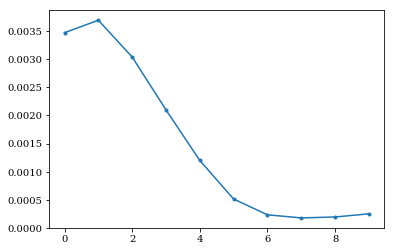

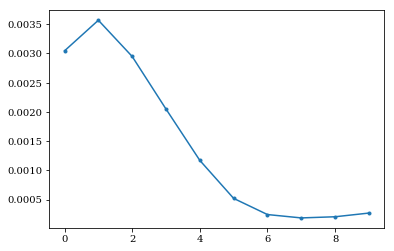

In [135]:
# 損失のグラフ化
loss_open = hist_open.history['loss']
epochs = len(loss_open)
plt.rc('font', family='serif')
fig_open = plt.figure()
fig_open.patch.set_facecolor('white')
plt.plot(range(epochs), loss_open, marker='.', label='loss(training data)')
plt.show()

loss_close = hist_close.history['loss']
epochs = len(loss_close)
plt.rc('font', family='serif')
fig_close = plt.figure()
fig_close.patch.set_facecolor('white')
plt.plot(range(epochs), loss_close, marker='.', label='loss(training data)')
plt.show()


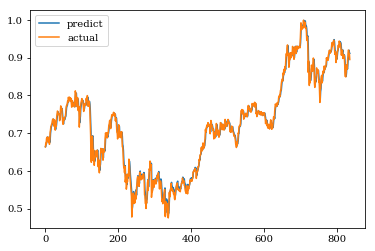

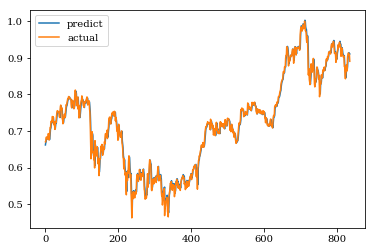

In [137]:
# 予測結果
predicted= model_open.predict(X_open_test)
result_open= pd.DataFrame(predicted)
result_open.columns = ['predict']
result_open['actual'] = Y_open_test
result_open.plot()
plt.show()

predicted = model_close.predict(X_close_test)
result_close = pd.DataFrame(predicted)
result_close.columns = ['predict']
result_close['actual'] = Y_close_test
result_close.plot()
plt.show()

In [140]:
high_low = []
for i in range(0,len(result_open)):
    if result_open['actual'][i] <= result_close['actual'][i]:
        high_low.append([result_open['actual'][i],result_close['actual'][i],1])
    else:
        high_low.append([result_open['actual'][i],result_close['actual'][i],-1])

high_low_pre = []
for i in range(0,len(result_open)):
    print(str(result_open['predict'][i]) + '\t' + str(result_close['predict'][i]))
    
    if result_open['predict'][i] <= result_close['predict'][i]:
        high_low_pre.append([result_open['predict'][i],result_close['predict'][i],1])
    else:
        high_low_pre.append([result_open['predict'][i],result_close['predict'][i],-1])

0.663876	0.661934
0.664774	0.668809
0.672226	0.670349
0.672185	0.680158
0.683502	0.682537
0.687025	0.682682
0.689633	0.68314
0.681293	0.678207
0.677609	0.6796
0.683887	0.69029
0.688151	0.684474
0.689709	0.676403
0.675214	0.677834
0.681193	0.690518
0.699162	0.705895
0.707405	0.707962
0.716026	0.717953
0.718598	0.724543
0.722507	0.722846
0.723894	0.725588
0.730862	0.736024
0.735641	0.735846
0.736994	0.737311
0.73232	0.724248
0.725027	0.717377
0.719576	0.72297
0.731903	0.717466
0.716866	0.705922
0.709667	0.715291
0.717412	0.723605
0.718166	0.722587
0.72901	0.733577
0.740298	0.743263
0.747841	0.751369
0.755824	0.753678
0.75624	0.752572
0.749993	0.751864
0.749915	0.749984
0.75026	0.750614
0.748629	0.741136
0.736285	0.736818
0.741343	0.749656
0.755379	0.762651
0.768646	0.768606
0.76685	0.761067
0.763268	0.756939
0.763866	0.760997
0.751014	0.737616
0.736484	0.731647
0.726006	0.721064
0.724525	0.7242
0.737315	0.735313
0.737574	0.736931
0.735656	0.743227
0.73908	0.73654
0.742648	0.740041
0.7447

In [141]:
count = 0
for i in range(0,(len(high_low)-1)):
    print(str(high_low[i][2]) + '\t' + str(high_low_pre[i+1][2]))
    if high_low[i][2] == high_low_pre[i+1][2]:
        count += 1
print(count/(len(high_low)-1))

1	1
-1	-1
1	1
-1	-1
-1	-1
-1	-1
-1	-1
1	1
1	1
-1	-1
-1	-1
1	1
1	1
1	1
1	1
1	1
1	1
1	1
1	1
1	1
1	1
1	1
-1	-1
-1	-1
1	1
-1	-1
-1	-1
1	1
1	1
1	1
1	1
1	1
1	1
-1	-1
-1	-1
1	1
1	1
1	1
-1	-1
1	1
1	1
1	1
-1	-1
-1	-1
-1	-1
-1	-1
-1	-1
-1	-1
-1	-1
1	-1
-1	-1
1	-1
1	1
-1	-1
-1	-1
1	1
1	1
1	1
-1	-1
1	1
1	1
1	1
1	1
-1	-1
1	1
1	1
-1	-1
1	1
-1	-1
1	1
-1	-1
-1	-1
-1	-1
1	1
-1	-1
1	1
-1	-1
-1	-1
-1	-1
1	-1
1	1
1	1
1	1
1	-1
-1	-1
-1	-1
1	1
1	1
-1	-1
1	1
1	-1
1	-1
-1	-1
1	1
-1	1
1	1
-1	1
1	-1
1	-1
-1	-1
1	1
-1	-1
-1	-1
-1	-1
-1	-1
1	1
-1	-1
1	1
1	1
1	1
1	1
1	1
-1	-1
1	1
1	1
-1	-1
-1	-1
1	1
1	1
1	1
-1	-1
-1	-1
-1	-1
-1	-1
-1	-1
-1	-1
1	1
-1	-1
1	1
-1	-1
-1	-1
1	1
-1	-1
-1	-1
1	1
-1	-1
1	1
1	1
1	1
-1	-1
-1	-1
-1	-1
1	1
-1	-1
-1	-1
1	1
-1	-1
-1	-1
1	-1
1	1
1	1
1	1
-1	-1
1	1
-1	-1
1	1
-1	-1
-1	-1
1	1
1	1
-1	-1
-1	-1
1	1
1	1
1	-1
-1	-1
-1	-1
1	1
-1	-1
1	1
-1	-1
-1	-1
1	1
1	1
1	1
1	1
1	1
1	1
1	1
1	1
-1	-1
-1	-1
-1	-1
1	1
1	1
-1	-1
1	-1
-1	-1
-1	-1
1	1
1	1
1	1
-1	-1
-1	-1
-1	-1
-1	-1
-1	-1
1	1
1	1
-1	-1
1	1
-1	

In [142]:
print(count/(len(high_low)-1))

0.8790419161676647


In [143]:
model_open.save('model_open')
model_close.save('model_close')

